# Проект: 'Аналитика рынка вакансий для HR-агентства'


## 1 Описание проекта
В нашем распоряжении находятся реальные данные от HR-агентства

Цель исследования: выявить признаки вакансий, привлекающих наибольшее внимание кандидатов и успешно закрывающихся силами агентства


## 2 Описание данных

Необходимые данные расположены в файле vacancy_clear.xlsx

Всего в датафрейме df 22 столбца
* id - уникальный идентификатор вакансии;
* Статус - статус вакансии;
* Источник лида - источник вакансии;
* менеджер - менеджер, ответственный за вакансию;
* дата публикации - дата, когда вакансия была опубликована на сайте КА;
* дата закрытия - дата, когда заказчик одобрил кандидата КА или отказался от услуг КА по данной вакансии;
* количество просмотров - количество уникальных пользователей сайта, кликнувших на заголовок вакансии, чтобы увидеть всю вакансию;
* количество откликов - количество уникальных пользователей сайта, отправивших отклик на вакансию;
* позиция - название вакансии;
* зарплата от - нижняя граница заработной платы для вакансии. Поле может быть пустым;
* зарплата до - верхняя граница заработной платы для вакансии. Поле может быть пустым;
* город - в каких городах предлагается работа вне зависимости от формата;
* формат оформления - какой формат оформления предлагает заказчик;
* формат работы - какой формат работы предлагает заказчик;
* опыт - какой опыт работы должен быть у соискателя;
* образование - какое образование должно быть у соискателя;
* ссылка на тестовое - есть ли ссылка на тестовое задание в описании вакансии;
* занятость - какой формат занятости предлагает заказчик;
* обязательные требования - какие обязательные требования предъявляет заказчик к кандидатам;
* дополнительные требования - какеи дополнительные требования предъявляет заказчик к кандидатам;
* этапы отбора - этапы отбора на должность;
* условия - краткое тестовое описание условий вакансии. Может повторить информацию из других столбцов

Ход исследования содержит следующие этапы:

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных, генерация новых признаков
4. Проверка статистических гипотез
5. Подготовка презентации и выработка рекомендаций для заказчика


1. Загрузка данных

In [5]:
! pip install squarify
! pip install july

In [6]:
# Загрузим библиотеки, необходимые для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from scipy import stats as st
from plotly import express as ex
import statsmodels.api as sm
import squarify
import random
import matplotlib.patches as patches
import datetime as dt
import matplotlib as mpl
import numpy as np
import july
from july.utils import date_range
from plotly import graph_objects as go


In [7]:
df = pd.read_excel('/content/vacancy_clear.xlsx')

In [8]:
df

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,...,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,...,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме_x000D_\n- Техническое интерв...,У нас вы получите возможность:_x000D_\n- Работ...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,...,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение_...,1. Скрининг резюме_x000D_\n2. Тестовое задание...,Стабильный оклад + премия по итогам года/проек...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,2068,Активна,Повторная,менеджер 3,2023-12-22,NaN,4,2,Product Manager,80000.0,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,Опыт проведения CustDev_x000D_\nЖелание погруз...,NaN,1. Скрининг резюме_x000D_\n2. Собеседование,Парт-тайм занятость с постепенным погружением ...
1280,2070,Активна,Реферальная,менеджер 9,2023-12-22,NaN,2,2,Android/ IOS Developer,NaN,...,Самозанятость,"Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Проектная,нет,Нужен разработчик мобильных приложений (ios и/...,NaN,1. Скрининг резюме_x000D_\n2. Собеседование,"Удаленка, но можно приходить в офис Яндекса пе..."
1281,2071,Активна,Сорсинг,менеджер 9,2023-12-22,NaN,4,1,Product Manager,80000.0,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,Понимание проведений исследований _x000D_\nГот...,NaN,1. Скрининг резюме _x000D_\n2. Собеседование,Парт-тайм с постепенным развитием в проекта и ...
1282,2072,Активна,Повторная,менеджер 9,2023-12-29,NaN,3,1,Product Manager,100000.0,...,"ИП, Трудовой договор","Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,● наличие опыта в продуктовом менеджмента; _x0.

In [9]:
df.shape

(1284, 22)

Всего в датасете 1284 строки и 22 столбца

In [10]:
# вывеедем первые пять строк таблицы
df.head()

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,...,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,...,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме_x000D_\n- Техническое интерв...,У нас вы получите возможность:_x000D_\n- Работ...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,...,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение_...,1. Скрининг резюме_x000D_\n2. Тестовое задание...,Стабильный оклад + премия по итогам года/проек...


In [11]:
# посмотрим на последние пять строк
df.tail()

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,...,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
1279,2068,Активна,Повторная,менеджер 3,2023-12-22,NaN,4,2,Product Manager,80000.0,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,Опыт проведения CustDev_x000D_\nЖелание погруз...,NaN,1. Скрининг резюме_x000D_\n2. Собеседование,Парт-тайм занятость с постепенным погружением ...
1280,2070,Активна,Реферальная,менеджер 9,2023-12-22,NaN,2,2,Android/ IOS Developer,NaN,...,Самозанятость,"Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Проектная,нет,Нужен разработчик мобильных приложений (ios и/...,NaN,1. Скрининг резюме_x000D_\n2. Собеседование,"Удаленка, но можно приходить в офис Яндекса пе..."
1281,2071,Активна,Сорсинг,менеджер 9,2023-12-22,NaN,4,1,Product Manager,80000.0,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,Понимание проведений исследований _x000D_\nГот...,NaN,1. Скрининг резюме _x000D_\n2. Собеседование,Парт-тайм с постепенным развитием в проекта и ...
1282,2072,Активна,Повторная,менеджер 9,2023-12-29,NaN,3,1,Product Manager,100000.0,...,"ИП, Трудовой договор","Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,● наличие опыта в продуктовом менеджмента; _x0...,NaN,1. Скрининг резюме _x000D_\n2. Возможно неболь...,● Конкурентный уровень заработной платы;_x000D...
1283,2073,Активна,Повторная,менеджер 9,2023-12-29,NaN,51,17,Data Scientist в проект,NaN,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Стажировка,нет,Уделять проекту не менее 12 часов в неделю._x0...,NaN,1. Скрининг резюме _x000D_\n2. Тестовое задани...,Вы можете не иметь опыт и быть в нашей большой...


In [12]:
# посмотрим на названия полей
df.columns

Index(['id', 'Статус', 'Источник лида', 'Менеджер', 'Дата публикации',
       'Дата закрытия', 'Количество просмотров', 'Количество откликов',
       'Позиция', 'Зарплата от', 'Зарплата до', 'Город', 'Формат оформления',
       'Формат работы', 'Опыт', 'Образование', 'Занятость',
       'Ссылка на тестовое', 'Обязательные требования',
       'Дополнительный требования', 'Этапы отбора', 'Условия'],
      dtype='object')

In [13]:
df.sample(random_state=1, n = 20)

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,...,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
303,670,Закрыта нами,Повторная,менеджер 9,2023-04-10,2023-05-26,52,38,Тестировщик (ручной),30000.0,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,-За плечами у стажера должен быть как минимум ...,NaN,1) Скрининг резюме _x000D_\n2) Звонок с контак...,- Удаленка _x000D_\n- Фул-тайм_x000D_\n- Стажи...
355,739,Архив,Сорсинг,менеджер 9,2023-04-18,2023-06-26,5,4,Системный аналитик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,"Знание Excel, Google Таблиц (уверенный пользов...",Понимание базовых принципов UX_x000D_\nЗнание ...,"1, Скрининг резюме _x000D_\n2. Созвон с командой",- Удаленка _x000D_\n- Оформление в штат _x000D...
452,877,Архив,Повторная,менеджер 9,2023-05-22,2023-05-23,28,4,Тестировщик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,Теоретические знания в области методологии тес...,Практический опыт программирования на каком ли...,1. скрининг резюме _x000D_\n2. интервью с рекр...,Удаленка _x000D_\nИндивидуальный график работы...
259,611,Архив,Сорсинг,менеджер 9,2023-03-29,2023-06-26,39,27,Python-разработчик,40000.0,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,-Знание Python -_x000D_\n-Хорошая алгоритмичес...,Наличие технического образования,1. Скрининг резюме _x000D_\n2. HR-интервью_x00...,- Удаленка_x000D_\n- В штат _x000D_\n_x000D_\n...
789,1385,Архив,Повторная,менеджер 9,2023-08-04,2023-09-19,51,13,Ведущий консультант отдела мониторинга экономи...,NaN,...,Трудовой договор,"Офис, Гибрид","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,Высокие навыки работы с MS Office (особенно Ex...,NaN,1. Скрининг резюме _x000D_\n2. Собеседование,Работа над проектами в масштабах всей страны._...
60,355,Архив,Повторная,менеджер 1,2023-01-25,2023-02-09,15,6,Рекрутер / Младший HR-менеджер,NaN,...,Трудовой договор,"Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах","На смежных специальностях, Профильное",Полная,нет,"- легко получается общаться с новыми людьми, т...",- профильное образование HR или психология;_x0...,Интервью с руководителем_x000D_\n_x000D_\nНапи...,- работа в одном из ведущих digital агентств Р...
857,1494,Закрыта нами,Сорсинг,менеджер 9,2023-08-18,2023-10-17,36,15,Python-разработчик,30000.0,...,Самозанятость,"Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,* Python3.9+_x000D_\n* Опыт работы с микрофрей...,Желательно наличие высшего образования по техн...,1. Скрининг резюме _x000D_\n2. Первичная бесед...,"Офис, Гибрид, Удалёнка_x000D_\nОфис в г. Калин..."
198,532,Закрыта нами,Реферальная,менеджер 9,2023-03-14,2023-03-29,49,4,UX/UI дизайнер,NaN,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Figma_x000D_\nTelegraph- понимание, что можно/...",Origami studio_x000D_\nCSS_x000D_\nHTML,1. Скрининг резюме _x000D_\n2. Тестовое Задани...,- Вне штата_x000D_\n- Проектная работа для пор...
831,1454,Отклонена,Входящая заявка,менеджер 5,2023-08-14,2023-09-12,22,4,Full-stack QA engineer,NaN,...,Трудовой договор,Гибрид,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На

In [14]:
# посмотрим на типы данных
df.dtypes

id                             int64
Статус                        object
Источник лида                 object
Менеджер                      object
Дата публикации               object
Дата закрытия                 object
Количество просмотров          int64
Количество откликов            int64
Позиция                       object
Зарплата от                  float64
Зарплата до                  float64
Город                         object
Формат оформления             object
Формат работы                 object
Опыт                          object
Образование                   object
Занятость                     object
Ссылка на тестовое            object
Обязательные требования       object
Дополнительный требования     object
Этапы отбора                  object
Условия                       object
dtype: object

In [15]:
# Изучим общую информацию о датафрейме df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1284 non-null   int64  
 1   Статус                     1284 non-null   object 
 2   Источник лида              1274 non-null   object 
 3   Менеджер                   1193 non-null   object 
 4   Дата публикации            1284 non-null   object 
 5   Дата закрытия              1127 non-null   object 
 6   Количество просмотров      1284 non-null   int64  
 7   Количество откликов        1284 non-null   int64  
 8   Позиция                    1284 non-null   object 
 9   Зарплата от                469 non-null    float64
 10  Зарплата до                372 non-null    float64
 11  Город                      1284 non-null   object 
 12  Формат оформления          1284 non-null   object 
 13  Формат работы              1284 non-null   objec

Общий объем данных составил 220.8 КB . Всего 17 столбцов принадлежат к типу данных object, 3 столбца к целочисленному типу данных integer и 2 столбца к вещественному типу данных float

Вывод по загрузке данных: На первом шаге исследования загрузили данные из файла, изучили общую информацию о наборе данных, изучили типы данных, определиили размер датасета(1284 строки, 22 столбца). Подготовили данные к дальнейшей предобработке

2. Предобработка данных

In [16]:
# выведем снова первые пять строк таблицы
df.head()

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,...,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,...,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме_x000D_\n- Техническое интерв...,У нас вы получите возможность:_x000D_\n- Работ...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,...,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение_...,1. Скрининг резюме_x000D_\n2. Тестовое задание...,Стабильный оклад + премия по итогам года/проек...


In [17]:
#применим нижний регистр к названиям столбцов, а также применим 'змеиный' регистр

df.columns = df.columns.str.lower().str.replace(' ','_')

In [18]:
df.columns

Index(['id', 'статус', 'источник_лида', 'менеджер', 'дата_публикации',
       'дата_закрытия', 'количество_просмотров', 'количество_откликов',
       'позиция', 'зарплата_от', 'зарплата_до', 'город', 'формат_оформления',
       'формат_работы', 'опыт', 'образование', 'занятость',
       'ссылка_на_тестовое', 'обязательные_требования',
       'дополнительный_требования', 'этапы_отбора', 'условия'],
      dtype='object')

In [19]:
df = df.rename(columns={'дополнительный_требования':'дополнительные_требования'}).copy()

In [20]:
df.head()

,id,статус,источник_лида,менеджер,дата_публикации,дата_закрытия,количество_просмотров,количество_откликов,позиция,зарплата_от,...,формат_оформления,формат_работы,опыт,образование,занятость,ссылка_на_тестовое,обязательные_требования,дополнительные_требования,этапы_отбора,условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,...,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме_x000D_\n- Техническое интерв...,У нас вы получите возможность:_x000D_\n- Работ...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,...,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение_...,1. Скрининг резюме_x000D_\n2. Тестовое задание...,Стабильный оклад + премия по итогам года/проек...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1284 non-null   int64  
 1   статус                     1284 non-null   object 
 2   источник_лида              1274 non-null   object 
 3   менеджер                   1193 non-null   object 
 4   дата_публикации            1284 non-null   object 
 5   дата_закрытия              1127 non-null   object 
 6   количество_просмотров      1284 non-null   int64  
 7   количество_откликов        1284 non-null   int64  
 8   позиция                    1284 non-null   object 
 9   зарплата_от                469 non-null    float64
 10  зарплата_до                372 non-null    float64
 11  город                      1284 non-null   object 
 12  формат_оформления          1284 non-null   object 
 13  формат_работы              1284 non-null   objec

In [22]:
# поменяем тип данных для столбцов дата_публикации и дата_закрытия
df['дата_публикации'] = pd.to_datetime(df['дата_публикации'], format ='%Y-%m-%d')
df['дата_закрытия'] = pd.to_datetime(df['дата_закрытия'], format ='%Y-%m-%d')

In [23]:
# посмотрим есть ли дубликаты в данных
df.duplicated().sum()

0

In [24]:
df.isna().mean().round(2)

id                           0.00
статус                       0.00
источник_лида                0.01
менеджер                     0.07
дата_публикации              0.00
дата_закрытия                0.12
количество_просмотров        0.00
количество_откликов          0.00
позиция                      0.00
зарплата_от                  0.63
зарплата_до                  0.71
город                        0.00
формат_оформления            0.00
формат_работы                0.00
опыт                         0.00
образование                  0.00
занятость                    0.00
ссылка_на_тестовое           0.00
обязательные_требования      0.00
дополнительные_требования    0.49
этапы_отбора                 0.00
условия                      0.00
dtype: float64

In [25]:
len(df)

1284

In [26]:
df_new = df.dropna(subset = ['источник_лида','менеджер','дата_закрытия'])

In [27]:
df_new.isna().mean().round(3)

id                           0.000
статус                       0.000
источник_лида                0.000
менеджер                     0.000
дата_публикации              0.000
дата_закрытия                0.000
количество_просмотров        0.000
количество_откликов          0.000
позиция                      0.000
зарплата_от                  0.629
зарплата_до                  0.699
город                        0.000
формат_оформления            0.000
формат_работы                0.000
опыт                         0.000
образование                  0.000
занятость                    0.000
ссылка_на_тестовое           0.000
обязательные_требования      0.000
дополнительные_требования    0.474
этапы_отбора                 0.000
условия                      0.000
dtype: float64

Для столбцов 'зарплата_от' и 'зарплата_до' заполним пропуски медианным значением соответствующих столбцов. Для столбца дополнительные_требования пропуски заполним значением 'отсутствуют'

In [28]:
median_salary_1 = df_new['зарплата_от'].median()

In [29]:
median_salary_2 = df_new['зарплата_до'].median()

In [30]:
df_new['зарплата_от'] = df_new['зарплата_от'].fillna(median_salary_1)
df_new['зарплата_до'] = df_new['зарплата_до'].fillna(median_salary_2)

<ipython-input-30-08f64985d2a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['зарплата_от'] = df_new['зарплата_от'].fillna(median_salary_1)
<ipython-input-30-08f64985d2a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['зарплата_до'] = df_new['зарплата_до'].fillna(median_salary_2)


In [31]:
df_new['дополнительные_требования'] = df_new['дополнительные_требования'].fillna('отсутствуют')

<ipython-input-31-c00f45dcb8e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['дополнительные_требования'] = df_new['дополнительные_требования'].fillna('отсутствуют')


In [32]:
df_new.isna().sum()

id                           0
статус                       0
источник_лида                0
менеджер                     0
дата_публикации              0
дата_закрытия                0
количество_просмотров        0
количество_откликов          0
позиция                      0
зарплата_от                  0
зарплата_до                  0
город                        0
формат_оформления            0
формат_работы                0
опыт                         0
образование                  0
занятость                    0
ссылка_на_тестовое           0
обязательные_требования      0
дополнительные_требования    0
этапы_отбора                 0
условия                      0
dtype: int64

In [33]:
df_new

,id,статус,источник_лида,менеджер,дата_публикации,дата_закрытия,количество_просмотров,количество_откликов,позиция,зарплата_от,...,формат_оформления,формат_работы,опыт,образование,занятость,ссылка_на_тестовое,обязательные_требования,дополнительные_требования,этапы_отбора,условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,40000.0,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,40000.0,...,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",отсутствуют,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,40000.0,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
6,282,Архив,Повторная,менеджер 3,2023-01-10,2023-03-27,34,10,junior Project Manager,40000.0,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,Разговорный английский язык - уверенный B2 и в...,Будет плюсом:_x000D_\nОпыт работы с проектами ...,1. Скрининг резюме (важно аккуратное оформлени...,ТОЛЬКО ОФИСНАЯ ЗАНЯТОСТЬ В МОСКВЕ _x000D_\n_x0...
7,283,Отклонена,Входящая заявка,менеджер 9,2023-01-10,2023-03-24,46,13,Тестировщик (ручной),70000.0,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...","Офис, Гибрид","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,- Наличие высшего образования_x000D_\n-Опыт ра...,-Проявлять интерес к электронике;_x000D_\n-Зак...,1. Собеседование HR удаленно_x000D_\n2. Собесе...,Гибрид или офис в 5 минутах от станции м. Войк...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2002,Закрыта нами,Входящая заявка,менеджер 9,2023-12-05,2023-12-28,56,45,Тестировщик,50000.0,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,- Знает что такое клиент-серверное взаимодейст...,отсутствуют,1. Скрининг резюме _x000D_\n2. Онлайн-собеседо...,Удаленка_x000D_\nПарт-тайм (минимум 3 часа в д...
1239,2010,Архив,Сорсинг,менеджер 9,2023-12-06,2023-12-20,23,15,Стажер-разработчик Python,40000.0,...,"Контракт, Трудовой договор, ГПХ","Офис, Гибрид","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Стажировка,нет,Вы - студент Очной формы обучения_x000D_\n_x00...,отсутствуют,1. Скрининг резюме _x000D_\n2. Тестовое Задани...,"Мы заботимся о тебе: оплачиваемая стажировка, ..."
1240,2011,Архив,Входящая заявка,менеджер 9,2023-12-06,2023-12-21,10,3,Специалист по таргетированной рекламе / Таргет...,70000.0,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...","Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,Знания в области интернет-маркетинга;_x000D_\n...,"Опыт работы с нишами недвижимости, автодилеров...",1. Скрининг резюме _x000D_\n2. Собеседование _...

Вывод по предобработке данных. Во втором шаге исследования мы предобработали данные, поменяли для некоторых столбцов тип данных, привели названия столбцов к нижнему регистру, удалили пропуски, там где было необходимо. В результате количество строк в таблице df уменьшилось на 206 позиций. Далее проведем исследовательский анализ данных

## 3 Исследовательский анализ данных

In [34]:
df_new['id'].agg(['count','nunique'])

count      1078
nunique    1078
Name: id, dtype: int64

Всего 1078 уникальных идентификаторов вакансии

In [35]:
df_new['день_недели_публикации'] = df_new['дата_публикации'].dt.day_name()
df_new['день_недели_закрытия'] = df_new['дата_закрытия'].dt.day_name()

<ipython-input-35-8402c7987524>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['день_недели_публикации'] = df_new['дата_публикации'].dt.day_name()
<ipython-input-35-8402c7987524>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['день_недели_закрытия'] = df_new['дата_закрытия'].dt.day_name()


In [36]:
# создадим новые столбцы
df_new['месяц_публикации'] = pd.DatetimeIndex(df_new['дата_публикации']).month
df_new['месяц_закрытия'] = pd.DatetimeIndex(df_new['дата_закрытия']).month

<ipython-input-36-78468840f494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['месяц_публикации'] = pd.DatetimeIndex(df_new['дата_публикации']).month
<ipython-input-36-78468840f494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['месяц_закрытия'] = pd.DatetimeIndex(df_new['дата_закрытия']).month


In [37]:
# создадим новый признак коэффициент конверсии (conversion_rate), для этого разделим количество откликов на количество просмотров и умножим на 100
df_new['конверсия в %'] = (df_new['количество_откликов'] / df_new['количество_просмотров']) * 100
df_new

<ipython-input-37-3f6341fc7dcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['конверсия в %'] = (df_new['количество_откликов'] / df_new['количество_просмотров']) * 100


,id,статус,источник_лида,менеджер,дата_публикации,дата_закрытия,количество_просмотров,количество_откликов,позиция,зарплата_от,...,ссылка_на_тестовое,обязательные_требования,дополнительные_требования,этапы_отбора,условия,день_недели_публикации,день_недели_закрытия,месяц_публикации,месяц_закрытия,конверсия в %
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,40000.0,...,нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...,Wednesday,Wednesday,8,8,22.875817
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,40000.0,...,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",отсутствуют,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...,Tuesday,Tuesday,8,8,2.127660
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,40000.0,...,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ...",Monday,Tuesday,8,10,21.621622
6,282,Архив,Повторная,менеджер 3,2023-01-10,2023-03-27,34,10,junior Project Manager,40000.0,...,нет,Разговорный английский язык - уверенный B2 и в...,Будет плюсом:_x000D_\nОпыт работы с проектами ...,1. Скрининг резюме (важно аккуратное оформлени...,ТОЛЬКО ОФИСНАЯ ЗАНЯТОСТЬ В МОСКВЕ _x000D_\n_x0...,Tuesday,Monday,1,3,29.411765
7,283,Отклонена,Входящая заявка,менеджер 9,2023-01-10,2023-03-24,46,13,Тестировщик (ручной),70000.0,...,нет,- Наличие высшего образования_x000D_\n-Опыт ра...,-Проявлять интерес к электронике;_x000D_\n-Зак...,1. Собеседование HR удаленно_x000D_\n2. Собесе...,Гибрид или офис в 5 минутах от станции м. Войк...,Tuesday,Friday,1,3,28.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2002,Закрыта нами,Входящая заявка,менеджер 9,2023-12-05,2023-12-28,56,45,Тестировщик,50000.0,...,нет,- Знает что такое клиент-серверное взаимодейст...,отсутствуют,1. Скрининг резюме _x000D_\n2. Онлайн-собеседо...,Удаленка_x000D_\nПарт-тайм (минимум 3 часа в д...,Tuesday,Thursday,12,12,80.357143
1239,2010,Архив,Сорсинг,менеджер 9,2023-12-06,2023-12-20,23,15,Стажер-разработчик Python,40000.0,...,нет,Вы - студент Очной формы обучения_x000D_\n_x00...,отсутствуют,1. Скрининг резюме _x000D_\n2. Тестовое Задани...,"Мы заботимся о тебе: оплачиваемая стажировка, ...",Wednesday,Wednesday,12,12,65.217391
1240,2011,Архив,Входящая заявка,менеджер 9,2023-12-06,2023-12-21,10,3,Специалист по таргетированной рекламе / Таргет...,70000.0,...,нет,Знания в области интернет-маркетинга;_x000D_\n...,"Опыт работы с нишами недвижимости, автодилеров...",1. Скрининг резюме _x000D_\n2. Собеседование _...,Фуллтайм работу разного формата - в офисе (г.К...,Wednesday,Thursday,12,12,30.000000
1242,2016,Архив,Сорсинг,менеджер 9,2023-12-06,2023-12-29,54,16,Python-разработчик,120000.0,...,нет,"наличие навыков работы с python, fastapi, cele...",отсутствуют,1. Скрининг резюме _x000D_\n2. Тестовое Задани...,"удаленный свободный график работы, _x000D_\nоф...",Wednesday,Friday,12,12,29.629630


## Heatmap

In [38]:
## Определяем степень  корреляции между количественными признаками
df_new.corr().round(2)

<ipython-input-38-2993af03b220>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr().round(2)


,id,количество_просмотров,количество_откликов,зарплата_от,зарплата_до,месяц_публикации,месяц_закрытия,конверсия в %
id,1.00,0.09,0.13,-0.03,0.02,0.98,0.86,0.08
количество_просмотров,0.09,1.00,0.65,-0.07,-0.08,0.12,0.16,-0.28
количество_откликов,0.13,0.65,1.00,-0.03,-0.05,0.13,0.14,0.29
зарплата_от,-0.03,-0.07,-0.03,1.00,0.41,-0.02,-0.03,0.02
зарплата_до,0.02,-0.08,-0.05,0.41,1.00,0.03,-0.00,-0.01
месяц_публикации,0.98,0.12,0.13,-0.02,0.03,1.00,0.86,0.07
месяц_закрытия,0.86,0.16,0.14,-0.03,-0.00,0.86,1.00,0.03
конверсия в %,0.08,-0.28,0.29,0.02,-0.01,0.07,0.03,1.00


<ipython-input-39-10ce75cd0171>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), xticklabels=df_new.corr().columns, yticklabels=df_new.corr().columns, cmap='bwr', center=0, annot=True)


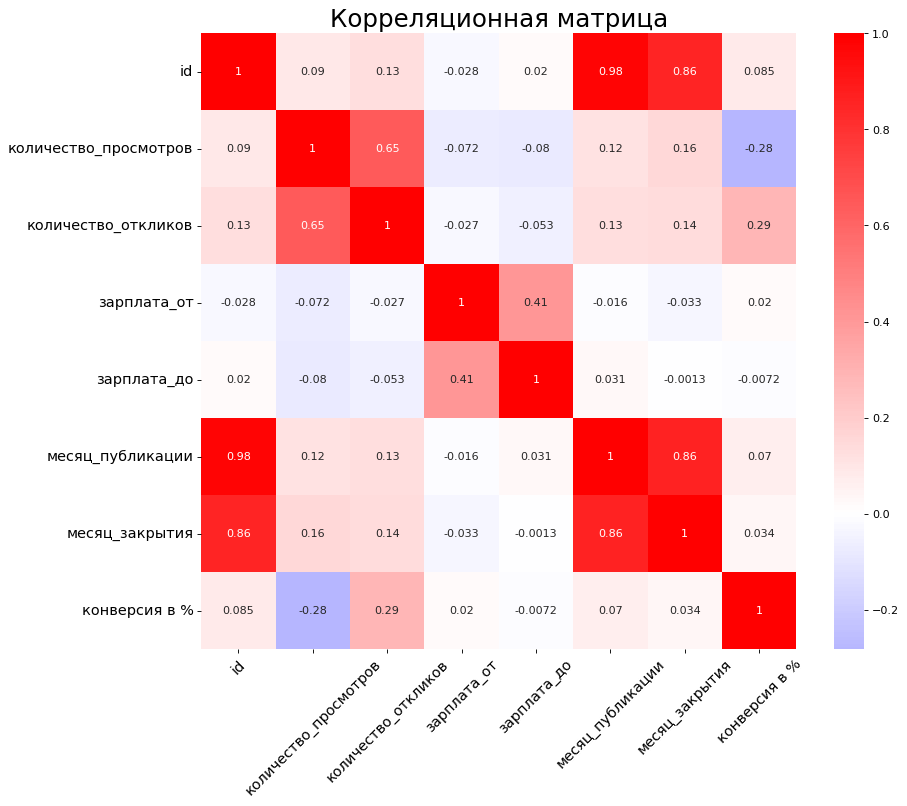

In [39]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_new.corr(), xticklabels=df_new.corr().columns, yticklabels=df_new.corr().columns, cmap='bwr', center=0, annot=True)


plt.title('Корреляционная матрица', fontsize=22)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation =45)
plt.show()

По данным корреляционной матрицы можно сделать следующие выводы:
*   Наблюдается заметная положительная связь между количеством откликов и количеством просмотров (0.65)
*  Наблюдается умеренная положительная связь между зарплатой_от и зарплатой_до (0.41)

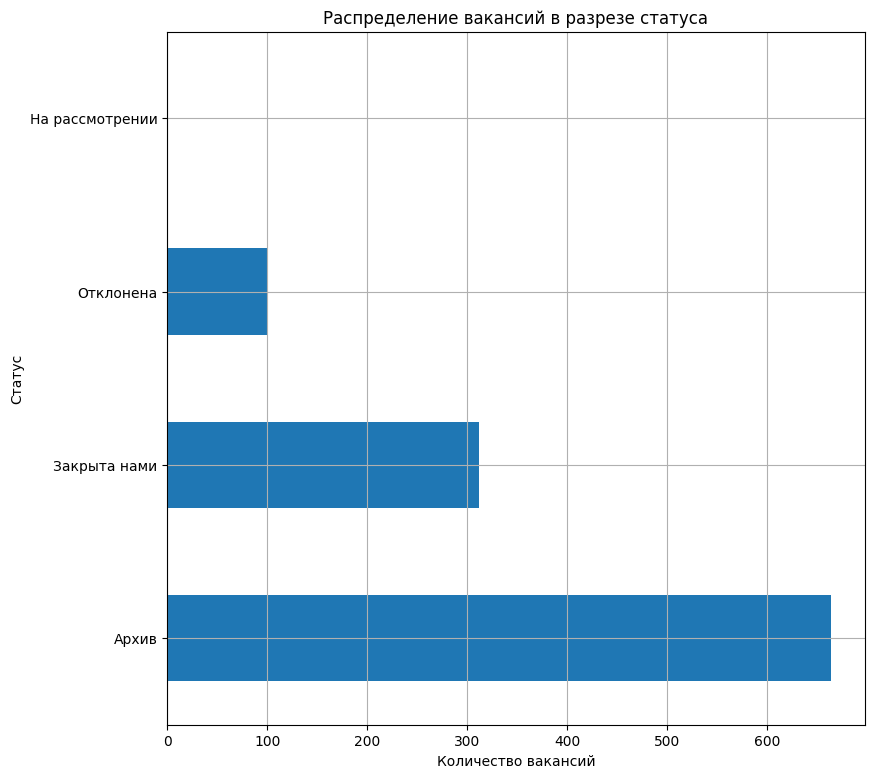

In [40]:
plt.figure(figsize=(9,9))
df_new['статус'].value_counts().plot(kind='barh',grid = True)
plt.title('Распределение вакансий в разрезе статуса')
plt.xlabel('Количество вакансий')
plt.ylabel('Статус')
plt.show()

In [41]:
df_new['статус'].value_counts(normalize=True).round(2)

Архив              0.62
Закрыта нами       0.29
Отклонена          0.09
На рассмотрении    0.00
Name: статус, dtype: float64

62 % вакансий находятся в архиве, 29 % закрыты КА, 9 % вакансий отклонены и практически нет вакансий, находящихся на рассмотрении

In [42]:
count = df_new['источник_лида'].value_counts()

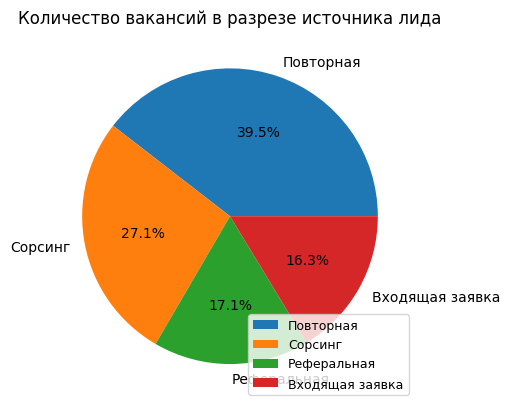

In [43]:
fig, ax = plt.subplots()
sizes = df_new['источник_лида'].value_counts()
labels = count.index
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title("Количество вакансий в разрезе источника лида")
plt.legend(fontsize=9, loc = 'lower right')
plt.show()

Круговая диаграмма позволяет сделать следующие выводы:
* 39.5 % всех вакансий являются повторной заявкой, что означает, что это не первая вакансия компании, подбор на которую будет делать КА(здесь и далее КА-кадровое агентство);
* 27.1 % вакансий относятся к сорсингу- то есть менеджеры КА привлекли заказчика исходящим поиском;
* 17.1 % вакансий имеют статус в качестве источника лида реферальную заявку - то есть заказчик пришел в КА по рекомендации от другого заказчика
* 16.3 % вакансий можно отнести к входящей заявке - заказчик сам заполнил форму на сайте КА

In [44]:
df_new['менеджер'].value_counts(normalize=True).round(2)

менеджер 9    0.46
менеджер 1    0.20
менеджер 5    0.14
менеджер 7    0.12
менеджер 3    0.04
менеджер 2    0.03
менеджер 6    0.01
Name: менеджер, dtype: float64

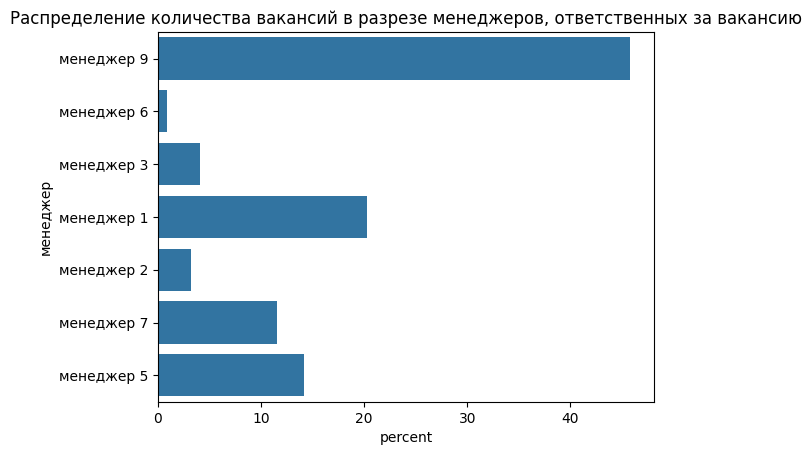

In [45]:
sns.countplot(df_new['менеджер'], stat = 'percent')
plt.title('Распределение количества вакансий в разрезе менеджеров, ответственных за вакансию')
plt.show()

Интересно, что менеджер 9 разбирает около 46 % вакансий, в то время как на втором месте менеджер 1, разбирающий 20 % всех вакансий. Менеджер 6 ответственен только лишь за 1 % вакансий

In [46]:
# посмотрим на минимальную и максимальную дату публикации вакансии
print('Минимальная дата публикации вакансии:',df_new['дата_публикации'].min())
print('Максимальная дата публикации вакансии:',df_new['дата_публикации'].max())

Минимальная дата публикации вакансии: 2023-01-10 00:00:00
Максимальная дата публикации вакансии: 2023-12-18 00:00:00


In [47]:
# посмотрим на минимальную и максимальную дату закрытия вакансии
print('Минимальная дата закрытия вакансии:',df_new['дата_закрытия'].min())
print('Максимальная дата закрытия вакансии:',df_new['дата_закрытия'].max())

Минимальная дата закрытия вакансии: 2023-01-24 00:00:00
Максимальная дата закрытия вакансии: 2024-01-09 00:00:00


In [48]:
# посмотрим на вакансии, которые закрывались в день публикации
df_new[df_new['дата_публикации'] == df_new['дата_закрытия']]

,id,статус,источник_лида,менеджер,дата_публикации,дата_закрытия,количество_просмотров,количество_откликов,позиция,зарплата_от,...,ссылка_на_тестовое,обязательные_требования,дополнительные_требования,этапы_отбора,условия,день_недели_публикации,день_недели_закрытия,месяц_публикации,месяц_закрытия,конверсия в %
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,40000.0,...,нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...,Wednesday,Wednesday,8,8,22.875817
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,40000.0,...,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",отсутствуют,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...,Tuesday,Tuesday,8,8,2.127660
216,554,Архив,Повторная,менеджер 6,2023-08-30,2023-08-30,19,6,Frontend developer (react/redux),40000.0,...,нет,"- Отличное знание JavaScript, HTML/CSS_x000D_\...",отсутствуют,1) Первичный скрининг_x000D_\n2) Технический с...,- Стабильный и прозрачный доход: размер зарабо...,Wednesday,Wednesday,8,8,31.578947
916,1573,Закрыта нами,Повторная,менеджер 9,2023-11-07,2023-11-07,117,57,Data Scientist,40000.0,...,нет,Уделять проекту не менее 12 часов в неделю._x0...,отсутствуют,1. Скрининг резюме _x000D_\n2. Тестовое задани...,Вы можете не иметь опыт и быть в нашей большой...,Tuesday,Tuesday,11,11,48.717949
1006,1695,Отклонена,Входящая заявка,менеджер 5,2023-09-25,2023-09-25,11,5,Junior QA,40000.0,...,нет,— Знать и уметь применять основные конструкции...,— Опыт работы с базами знаний типа Confluence;...,1. Просмотр резюме; _x000D_\n2. Созвон с HR-сп...,"— Работа в офисе, возможен гибрид; _x000D_\n— ...",Monday,Monday,9,9,45.454545
1106,1826,Закрыта нами,Повторная,менеджер 2,2023-11-22,2023-11-22,18,8,Backend-разработчик со знанием frontend,80000.0,...,нет,"- JS + TypeScript, HTML, CSS, NodeJS, React_x0...",Желательны: _x000D_\n- реляционные базы данных...,1. Скрининг_x000D_\n2. Собеседование/тестовое,"- оформление по ТК РФ,_x000D_\n- работа в офис...",Wednesday,Wednesday,11,11,44.444444


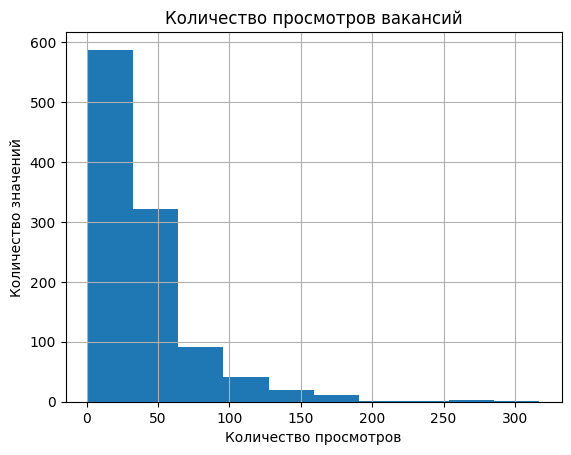

In [49]:
df_new['количество_просмотров'].hist()
plt.title('Количество просмотров вакансий')
plt.xlabel('Количество просмотров')
plt.ylabel('Количество значений')
plt.show()

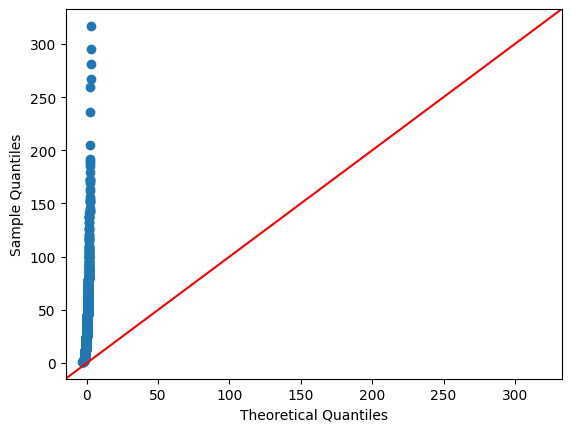

In [50]:
fig = sm.qqplot(df_new['количество_просмотров'], line='45')
plt.show()

По данным графика QQ plot Значения данных явно не соответствуют красной линии под углом 45 градусов, что указывает на то, что они не следуют закону нормального распределения.

In [51]:
df_new['количество_просмотров'].describe().round(2)

count    1078.00
mean       39.51
std        37.74
min         1.00
25%        15.00
50%        29.50
75%        50.00
max       317.00
Name: количество_просмотров, dtype: float64

<Axes: ylabel='количество_просмотров'>

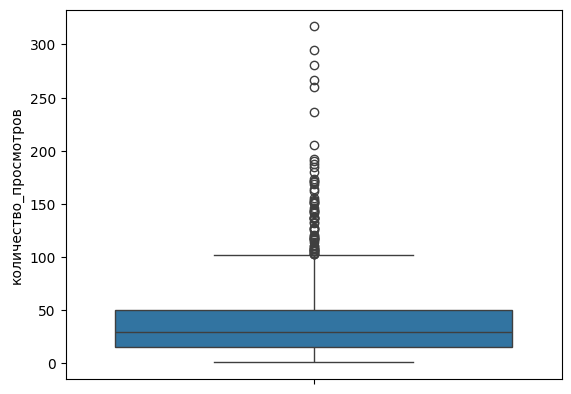

In [52]:
sns.boxplot(df_new['количество_просмотров'])

In [53]:
# определим верхнюю границу выбросов
outliers =  1.5 * (50-15) + 50
outliers

102.5

In [54]:
np.percentile(df_new['количество_просмотров'],94)

102.38

94 % всех наблюдений в столбце 'количество просмтров' меньше 102.38

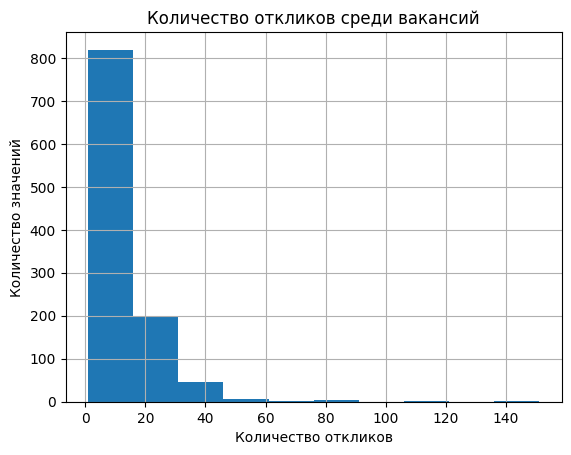

In [55]:
df_new['количество_откликов'].hist()
plt.title('Количество откликов среди вакансий')
plt.xlabel('Количество откликов')
plt.ylabel('Количество значений')
plt.show()

Видим, что значения скошены преимущественно влево, и распределение нельзя назвать нормальным

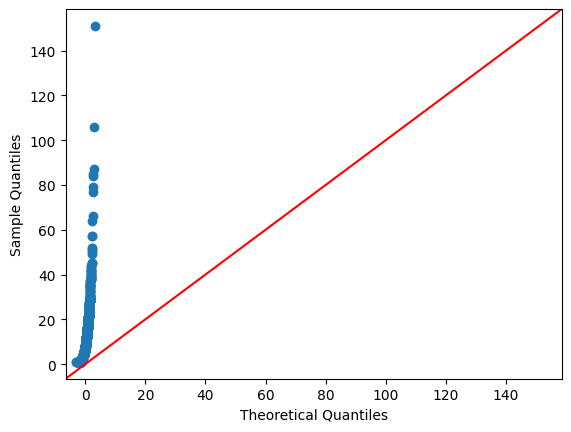

In [56]:
fig = sm.qqplot(df_new['количество_откликов'], line='45')
plt.show()

По данным графика qq plot, можно с уверенностью сказать, что значения данных для нашего признака явно не соответствует красной линии под углом в 45 градусов и распределение нельзя считать нормальным

In [57]:
df_new['количество_откликов'].describe()

count    1078.000000
mean       11.294991
std        12.232208
min         1.000000
25%         4.000000
50%         8.000000
75%        15.000000
max       151.000000
Name: количество_откликов, dtype: float64

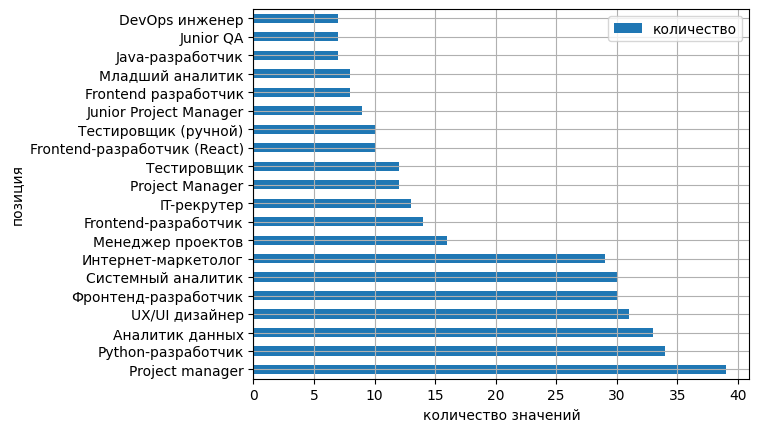

In [58]:
# посмотрим какие позиции популярны среди вакансий, выделим 20 популярных позиций
top_20 = df_new['позиция'].value_counts()[:20].reset_index()
top_20.columns = ['позиция','количество']
top_20.plot(kind='barh',grid = True, x = 'позиция')
plt.xlabel('количество значений')
plt.show()

In [59]:
top_20

,позиция,количество
0,Project manager,39
1,Python-разработчик,34
2,Аналитик данных,33
3,UX/UI дизайнер,31
4,Фронтенд-разработчик,30
5,Системный аналитик,30
6,Интернет-маркетолог,29
7,Менеджер проектов,16
8,Frontend-разработчик,14
9,IT-рекрутер,13


Наибольший спрос на такие вакансии, как project manager, python-разработчик и аналитик данных

In [60]:
df_new['позиция'].agg(['count','nunique'])

count      1078
nunique     562
Name: позиция, dtype: int64

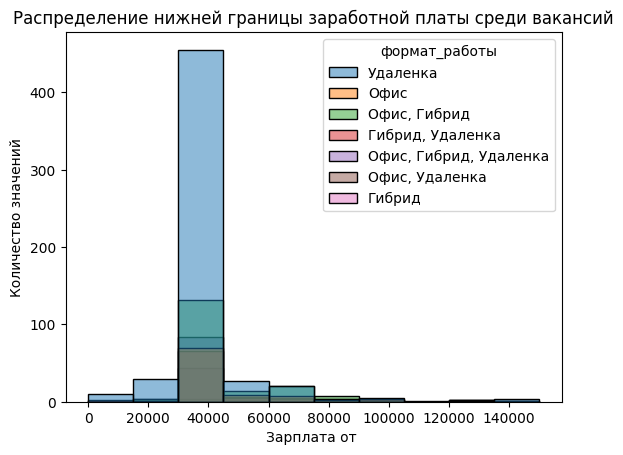

In [61]:
sns.histplot(data = df_new, x = 'зарплата_от', bins = 10, hue = 'формат_работы', stat = 'count')
plt.title('Раcпределение нижней границы заработной платы среди вакансий')
plt.xlabel('Зарплата от ')
plt.ylabel('Количество значений')
plt.show()


In [62]:
df_new['зарплата_от'].describe()

count      1078.000000
mean      42579.267161
std       16133.392682
min           0.000000
25%       40000.000000
50%       40000.000000
75%       40000.000000
max      150000.000000
Name: зарплата_от, dtype: float64

Средняя нижняя граница заработной платы составляет 42580 рублей, медиана набора данных равна 40000

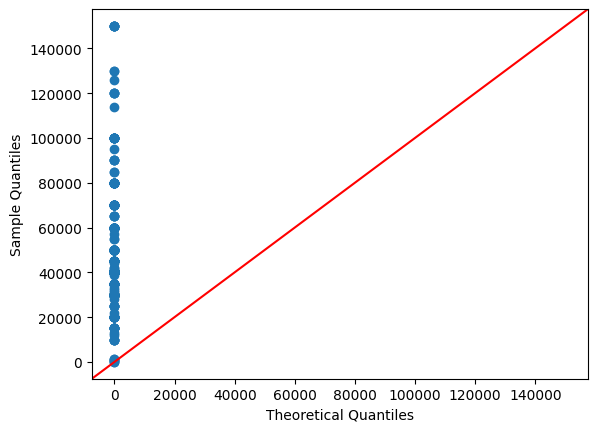

In [63]:
fig = sm.qqplot(df_new['зарплата_от'], line='45')
plt.show()

Согласно графику QQ plot, распределение признака нельзя назвать нормальным

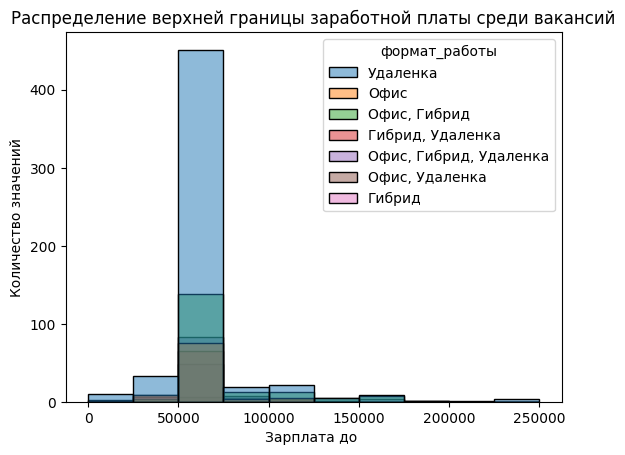

In [64]:
sns.histplot(data = df_new, x = 'зарплата_до', bins = 10, hue = 'формат_работы', stat = 'count')
plt.title('Раcпределение верхней границы заработной платы среди вакансий')
plt.xlabel('Зарплата до ')
plt.ylabel('Количество значений')
plt.show()

In [65]:
df_new['зарплата_до'].describe()

count      1078.000000
mean      68191.294063
std       23651.587632
min           0.000000
25%       65000.000000
50%       65000.000000
75%       65000.000000
max      250000.000000
Name: зарплата_до, dtype: float64

Среднее значение верхней границы заработной платы = 68191 рубль, медиана набора данных равна 65000 рублей

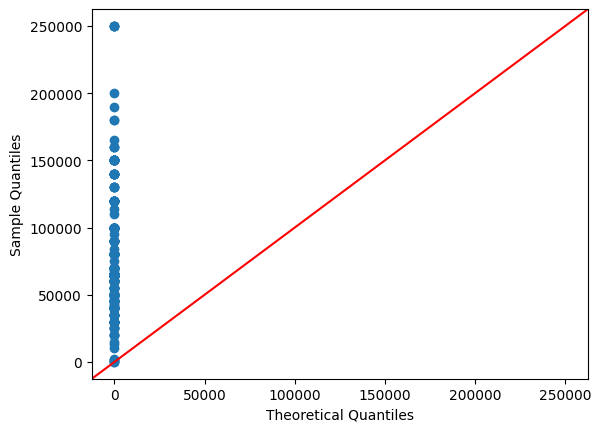

In [66]:
fig = sm.qqplot(df_new['зарплата_до'], line = '45')
plt.show()

In [67]:
# посмотрим на список городов, в которых представлены вакансии
df_new['город'].unique()

array(['Москва', 'Москва, Санкт-Петербург', 'Новосибирск', 'Казань',
       'Санкт-Петербург', 'Москва, Тбилиси', 'Краснодар', 'Самара',
       'Тула', 'Москва, Ростов-на-Дону', 'Алматы, Ангарск, Москва',
       'Москва, Тбилиси, Санкт-Петербург', 'Алматы', 'Будва', 'Бишкек',
       'Нижний Новгород',
       'Калининград, Екатеринбург, Таганрог, Тверь, Казань, Тбилиси, Оренбург, Воронеж, Ульяновск, Петрозаводск, Самара',
       'Москва, Казань, Санкт-Петербург', 'Москва, Санкт-Петербург, Омск',
       'Екатеринбург', 'Пятигорск', 'Москва, Омск',
       'Москва, Екатеринбург, Санкт-Петербург',
       'Алматы, Шымкент (Чимкент)', 'Уфа',
       'Москва, Санкт-Петербург, Новосибирск',
       'Санкт-Петербург, Волгоград, Уфа, Сургут, Екатеринбург, Москва, Ярославль, Казань, Владивосток, Иркутск, Нижний Новгород, Новосибирск, Самара, Красноярск, Ижевск, Калининград, Пермь, Краснодар, Воронеж, Хабаровск, Омск, Челябинск, Тюмень, Белгород',
       'Сочи', 'Владимир', 'Минск, Москва', 'Москва, 

In [68]:
df_new['город'].agg(['count','nunique'])

count      1078
nunique      83
Name: город, dtype: int64

In [69]:
# посмотрим на 20 самых популярных городов, где представлены вакансии
df_new['город'].value_counts()[:20]

Москва                                  736
Санкт-Петербург                         116
Москва, Санкт-Петербург                  26
Казань                                   19
Тюмень                                   10
Будва                                    10
Самара                                    9
Екатеринбург                              8
Алматы                                    7
Ростов-на-Дону                            7
Тула                                      7
Москва, Тбилиси                           6
Краснодар                                 5
Нижний Новгород                           5
Новосибирск                               5
Москва, Самара                            4
Москва, Казань                            3
Москва, Санкт-Петербург, Новосибирск      3
Уфа                                       3
Ульяновск, Москва                         3
Name: город, dtype: int64

In [70]:
df_new['формат_оформления'].unique()

array(['ИП, ГПХ, Самозанятость, Контракт, Трудовой договор', 'ГПХ',
       'Трудовой договор', 'Самозанятость, ГПХ', 'Самозанятость',
       'Самозанятость, Контракт, ИП, ГПХ', 'Самозанятость, ИП',
       'Самозанятость, ИП, ГПХ', 'Контракт',
       'Самозанятость, Трудовой договор', 'Трудовой договор, ГПХ',
       'Самозанятость, Трудовой договор, ГПХ',
       'Самозанятость, ИП, Трудовой договор, ГПХ',
       'Контракт, Трудовой договор, ГПХ', 'Контракт, ГПХ',
       'Контракт, Трудовой договор', 'Самозанятость, ИП, Контракт',
       'Самозанятость, Контракт',
       'Самозанятость, Контракт, Трудовой договор',
       'Самозанятость, Контракт, ГПХ',
       'Самозанятость, ИП, Трудовой договор', 'ИП, ГПХ', 'ИП',
       'Контракт, ИП, ГПХ',
       'Самозанятость, Контракт, Трудовой договор, ГПХ'], dtype=object)

In [71]:
format = df_new['формат_оформления'].value_counts().reset_index()
format.columns = ['формат_оформления','количество вакансий']
format

,формат_оформления,количество вакансий
0,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",399
1,Трудовой договор,269
2,Самозанятость,117
3,Контракт,59
4,"Самозанятость, ИП",50
5,"Самозанятость, Контракт, ИП, ГПХ",48
6,"Самозанятость, Трудовой договор",21
7,ГПХ,19
8,"Самозанятость, ИП, Трудовой договор",14
9,"Трудовой договор, ГПХ",13


<ipython-input-72-5815cb7868f8>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(format_new['формат_оформления'], rotation=60, horizontalalignment= 'right')


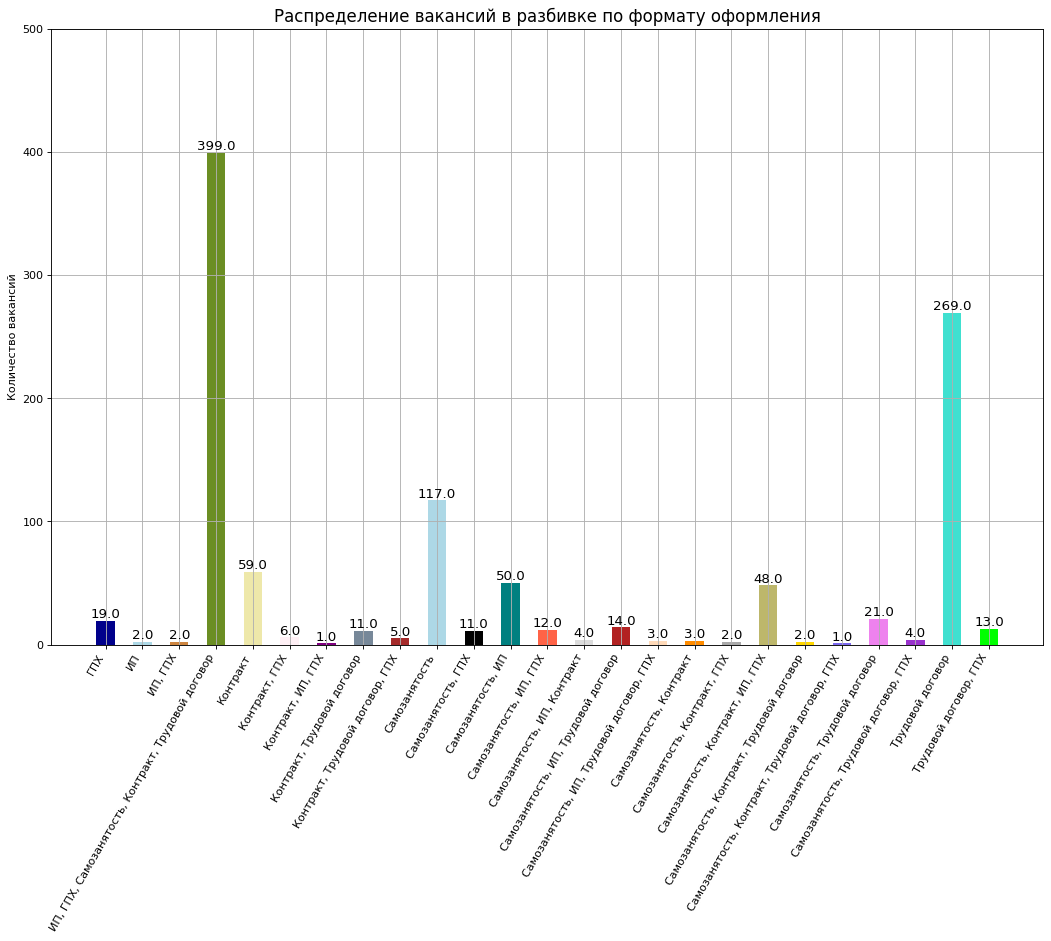

In [72]:
# готовим данные
format_new = df_new.groupby('формат_оформления').size().reset_index(name='counts')
n = df_new['формат_оформления'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# рисуем Plotbar
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(format_new['формат_оформления'], format_new['counts'], color=c, width=.5)
for i, val in enumerate(format_new['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# настраиваем названия полей
plt.gca().set_xticklabels(format_new['формат_оформления'], rotation=60, horizontalalignment= 'right')
plt.title('Распределение вакансий в разбивке по формату оформления', fontsize=15)
plt.ylabel('Количество вакансий')
plt.ylim(0, 500)
plt.grid(True)
plt.show()

Как видно из графика, наиболее популярным форматом оформления является 1 из 5 предложенных к кандидату: (ИП,ГПХ,Самозанятость, Контракт, Трудовой договор). Такой формат оформления встречается в 399 вакансиях. Далее на втором месте трудовой договор(он встречается в 269 вакансиях), на третьем месте - Самозанятость. Такой вариант предлагают в 117 вакансиях.

In [73]:
df_new['формат_работы'].value_counts()

Удаленка                  554
Офис, Гибрид              180
Офис, Гибрид, Удаленка    104
Офис                       93
Гибрид, Удаленка           79
Гибрид                     58
Офис, Удаленка             10
Name: формат_работы, dtype: int64

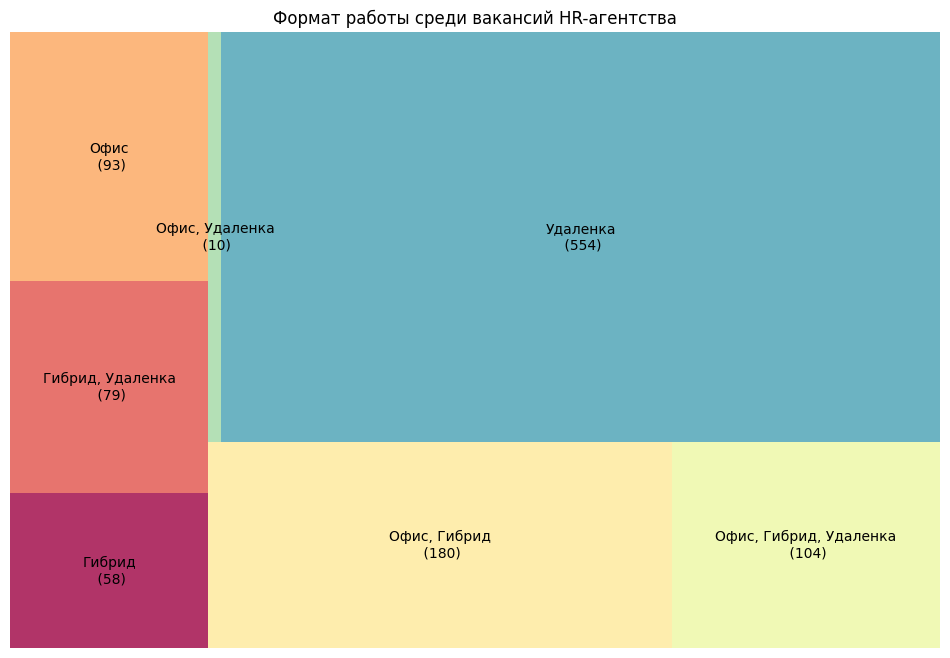

In [74]:
# построим древовидную карту
format_of_work = df_new.groupby('формат_работы').size().reset_index(name='counts')
labels = format_of_work.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = format_of_work['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Формат работы среди вакансий HR-агентства')
plt.axis('off')
plt.show()

Среди наиболее популярных форматов работы можно выделить:
* Удаленный формат(в 554 вакансиях)
* Офис,гибрид(в 180 вакансиях)
* офис,гибрид,удаленка(в 104 вакансиях)
* офис(в 93 вакансиях)
* гибрид, удаленка(в 79 вакансиях)
* гибрид(в 58 вакансиях)
* офис,удаленка(в 10 вакансиях)

In [75]:
df_new['опыт'].unique()

array(['До 1 года опыта, возможен опыт в pet-проектах; без опыта',
       'До 1 года опыта, возможен опыт в pet-проектах', 'Опыт от 1 года',
       'Без опыта'], dtype=object)

In [76]:
df_new['опыт'].value_counts()

До 1 года опыта, возможен опыт в pet-проектах; без опыта    985
До 1 года опыта, возможен опыт в pet-проектах                71
Опыт от 1 года                                               20
Без опыта                                                     2
Name: опыт, dtype: int64

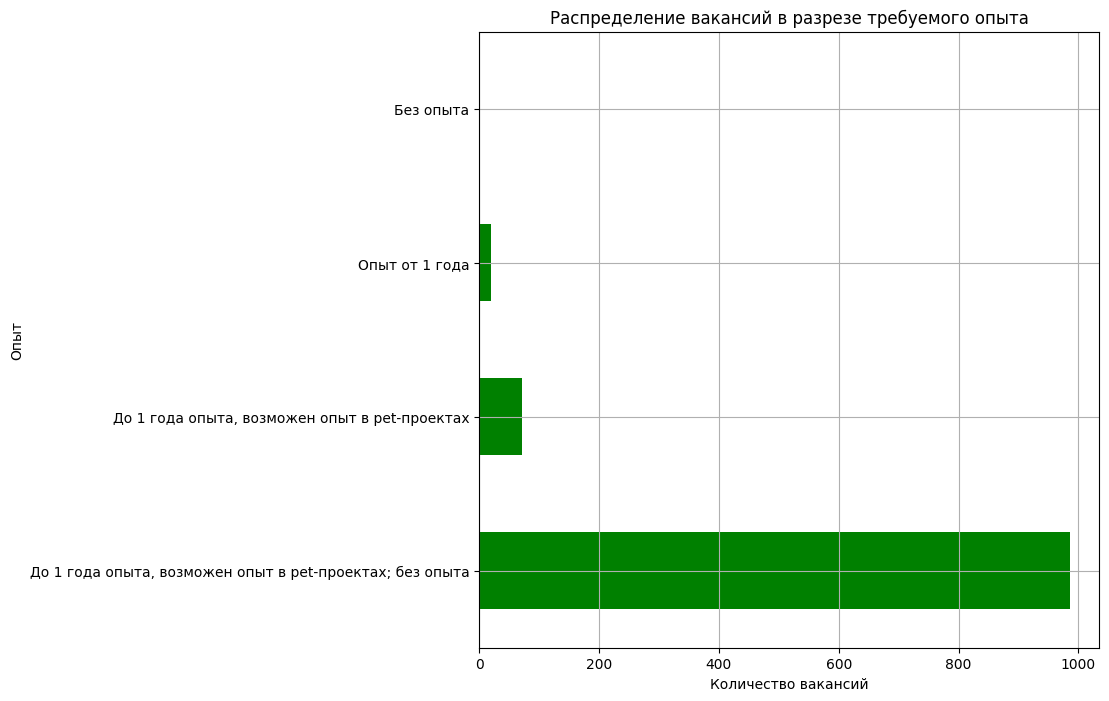

In [77]:
plt.figure(figsize=(8,8))
df_new['опыт'].value_counts().plot(kind='barh',color = 'g')
plt.title('Распределение вакансий в разрезе требуемого опыта')
plt.xlabel('Количество вакансий')
plt.ylabel('Опыт')
plt.grid(True)
plt.show()

В подавляющем большинстве вакансий требуется опыт работы до 1 года либо возможен опыт в pet-проектах либо рассматривают кандидатов без опыта работы.

В 71 вакансии рассматривают кандидатов с опытом работы до 1 года, либо с возможным опытом в pet-проектах

В 20 вакансиях рассматривают кандидатов с опытом работы от 1 года и лишь в 2 вакансиях рассматривают кандидатов без опыта работы



In [78]:
df_new['образование'].unique()

array(['Другое, На смежных специальностях, Профильное',
       'На смежных специальностях, Профильное', 'Профильное'],
      dtype=object)

In [79]:
df_new['образование'].value_counts()

Другое, На смежных специальностях, Профильное    1042
На смежных специальностях, Профильное              34
Профильное                                          2
Name: образование, dtype: int64

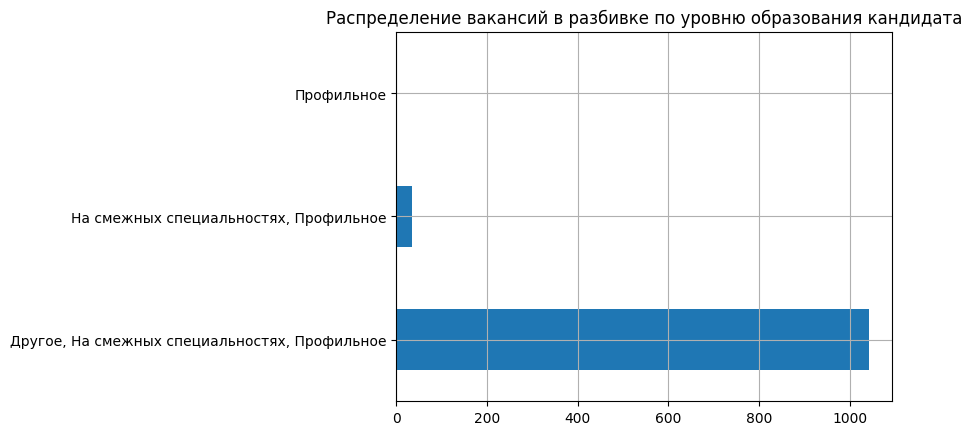

In [80]:
df_new['образование'].value_counts().plot(kind='barh')
plt.title('Распределение вакансий в разбивке по уровню образования кандидата')
plt.grid(True)
plt.show()

In [81]:
df_new['ссылка_на_тестовое'].value_counts()

нет    986
да      92
Name: ссылка_на_тестовое, dtype: int64

In [82]:
t = df_new[df_new['ссылка_на_тестовое'] == 'да']

In [83]:
t

,id,статус,источник_лида,менеджер,дата_публикации,дата_закрытия,количество_просмотров,количество_откликов,позиция,зарплата_от,...,ссылка_на_тестовое,обязательные_требования,дополнительные_требования,этапы_отбора,условия,день_недели_публикации,день_недели_закрытия,месяц_публикации,месяц_закрытия,конверсия в %
157,480,Закрыта нами,Входящая заявка,менеджер 1,2023-03-01,2023-03-27,15,4,Junior QA инженер,50000.0,...,да,• понимание процессов разработки ПО; _x000D_\n...,Плюсом будет: _x000D_\n • опыт работы с Pos...,Тестовое задание_x000D_\nИнтервью,"• Работа из офиса, график работы 5\2; _x000D_\...",Wednesday,Monday,3,3,26.666667
173,502,Архив,Сорсинг,менеджер 7,2023-03-06,2023-06-16,64,12,Инженер по тестированию,30000.0,...,да,- понимание процесса разработки и тестирования...,- хорошие коммуникативные навыки; _x000D_\n- р...,1. Скрининг резюме. _x000D_\n2. Тестовое задан...,- молодой дружный коллектив;_x000D_\n- менторс...,Monday,Friday,3,6,18.750000
180,509,Архив,Сорсинг,менеджер 7,2023-03-07,2023-05-29,53,12,Помощник менеджера проектов,35000.0,...,да,"- высшее образование (важен факт его наличия, ...",- опыт управления персоналом;_x000D_\n- опыт р...,1. Выполнение тестового задания._x000D_\n2. За...,"- талантливая молодая команда, отсутствие бюро...",Tuesday,Monday,3,5,22.641509
182,511,Архив,Сорсинг,менеджер 7,2023-03-07,2023-05-29,172,14,Инженер по тестированию с функцией техподдержки,25000.0,...,да,- быстрое изучение возможностей сервиса - от э...,- опыт тестирования ПО и веб-приложений;_x000D...,1. Выполнение тестового задания._x000D_\n2. За...,- удаленный формат работы; _x000D_\n- нестанда...,Tuesday,Monday,3,5,8.139535
186,517,Архив,Сорсинг,менеджер 7,2023-03-09,2023-06-08,102,5,Python разработчик (с функциями DevOps),40000.0,...,да,- знания Python + опыт в ООП;_x000D_\n- базовы...,- знания Devops;_x000D_\n- Docker - контейнири...,1. Выполнение тестового задания. _x000D_\n2. О...,- удаленный формат работы; _x000D_\n- гибкий г...,Thursday,Thursday,3,6,4.901961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1908,Архив,Сорсинг,менеджер 9,2023-11-07,2023-11-29,103,2,QA Engineer,40000.0,...,да,Опыт работы в тестировании веб-сервисов и знан...,"Будет плюсом, если вы:_x000D_\n_x000D_\nИмели ...",1. Тестовое по ссылке_x000D_\nhttps://crezu.no...,Удаленную работу на full-time;_x000D_\n28 кале...,Tuesday,Wednesday,11,11,1.941748
1171,1921,Архив,Входящая заявка,менеджер 7,2023-11-13,2023-11-15,9,1,Специалист по рекламе на маркетплейсах,40000.0,...,да,- Нахождение кандидата в РФ;_x000D_\n- Знание ...,- Опыт работы с внутренней рекламой вб и озон ...,1. Выполнение тестового задания. _x000D_\n2. О...,- Работа в быстроразвивающейся компании;_x000D...,Monday,Wednesday,11,11,11.111111
1198,1960,Закрыта нами,Повторная,менеджер 5,2023-11-21,2023-12-21,42,7,Project Manager (junior),40000.0,...,да,— Внимательность и системность; _x000D_\n— Жел...,— Навык работы по scrum; _x000D_\n— SQL не обя...,1. Просмотр резюме; _x000D_\n2. Тестовое задан...,"— Удаленная работа, но по желанию можно работа...",Tuesday,Thursday,11,12,16.666667
1202,1964,Архив,Сорсинг,менеджер 9,2023-11-22,2023-12-12,69,1,Frontend Разработчик,40000.0,...,да,Знание Vue.js_x000D_\nЗнание JavaScript_x000D_...,отсутствуют,1. Тестовое Задание _x000D_\n2. Собеседование,100% удаленная работа из любой точки мира_x000...,Wednesday,Tuesday,11,12,1.449275


In [84]:
df_new['занятость'].value_counts()

Полная                                                    647
Волонтерство, Проектная, Частичная, Стажировка, Полная     90
Стажировка                                                 65
Проектная, Частичная                                       53
Частичная                                                  37
Проектная                                                  32
Частичная, Полная                                          27
Проектная, Частичная, Полная                               23
Стажировка, Проектная, Частичная                           15
Стажировка, Проектная                                      15
Стажировка, Полная                                         14
Проектная, Полная                                          12
Стажировка, Частичная                                       8
Стажировка, Волонтерство, Проектная, Частичная              8
Стажировка, Волонтерство, Проектная                         7
Стажировка, Волонтерство, Частичная                         7
Стажиров

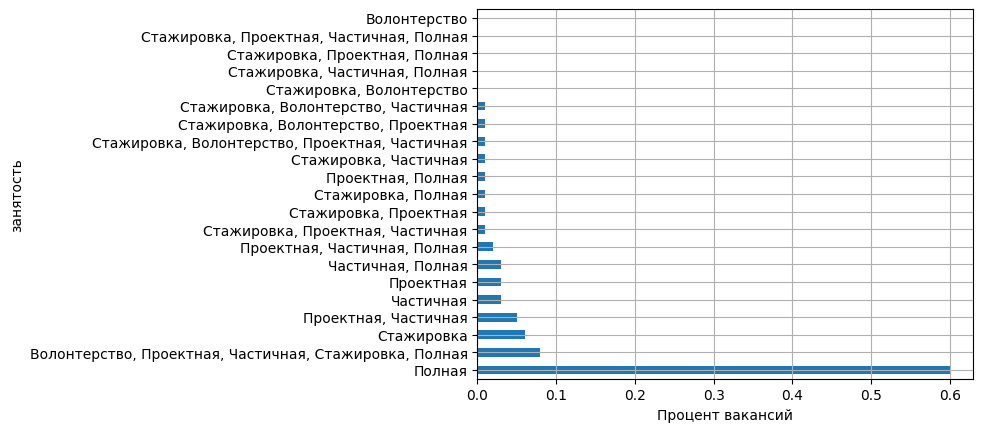

In [85]:
df_new['занятость'].value_counts(normalize= True).round(2).plot(kind='barh')
plt.grid(True)
plt.xlabel('Процент вакансий')
plt.ylabel('занятость')
plt.show()

<font color='red'>КОМЕНТАРИЙ РЕВЬЮЕРА</font>

Тут все корректно

Большинство вакансий предполагают полную занятость(60 %), далее следуют вакансии, предполагающие стажировку, проектную и частичную занятость.
Наименьшее количество вакансий, которые подразумевают волонтерство

In [86]:
df_new['обязательные_требования'].agg(['count','nunique'])

count      1078
nunique    1025
Name: обязательные_требования, dtype: int64

In [87]:
df_new['дополнительные_требования'].agg(['count','nunique'])

count      1078
nunique     534
Name: дополнительные_требования, dtype: int64

In [88]:
df_new['этапы_отбора'].agg(['count','nunique'])

count      1078
nunique     715
Name: этапы_отбора, dtype: int64

In [89]:
df_new['условия'].agg(['count','nunique'])

count      1078
nunique     981
Name: условия, dtype: int64

In [90]:
df_new['конверсия в %'].agg(['mean','median'])

mean      34.159972
median    30.769231
Name: конверсия в %, dtype: float64

In [91]:
df_new.columns

Index(['id', 'статус', 'источник_лида', 'менеджер', 'дата_публикации',
       'дата_закрытия', 'количество_просмотров', 'количество_откликов',
       'позиция', 'зарплата_от', 'зарплата_до', 'город', 'формат_оформления',
       'формат_работы', 'опыт', 'образование', 'занятость',
       'ссылка_на_тестовое', 'обязательные_требования',
       'дополнительные_требования', 'этапы_отбора', 'условия',
       'день_недели_публикации', 'день_недели_закрытия', 'месяц_публикации',
       'месяц_закрытия', 'конверсия в %'],
      dtype='object')

In [92]:
df_new.groupby('день_недели_публикации')['конверсия в %'].agg(['count','mean']).sort_values(by='count',ascending=False)

,count,mean
день_недели_публикации,,
Wednesday,232,34.708598
Monday,219,33.892511
Tuesday,212,33.947689
Friday,204,33.996254
Thursday,201,34.587226
Saturday,5,30.659520
Sunday,5,22.423785


Как видно из таблицы, в будние дни вакансии публикуются гораздо чаще, чем в выходные. Лидером по количеству опубликованных вакансий является среда (232), меньше всего вакансий публикуются в выходные дни

Также можно заметить, что конверсия из откликов в просмотры в будние дни выше, чем в выходные. В целом это логично, так как соискатели не видят смысла откликаться в выходные дни, так как большая часть hr не работает в субботу и воскресенье и не видят отклики. Наибольшая конверсия у вакансий, публикующихся среду и четверг

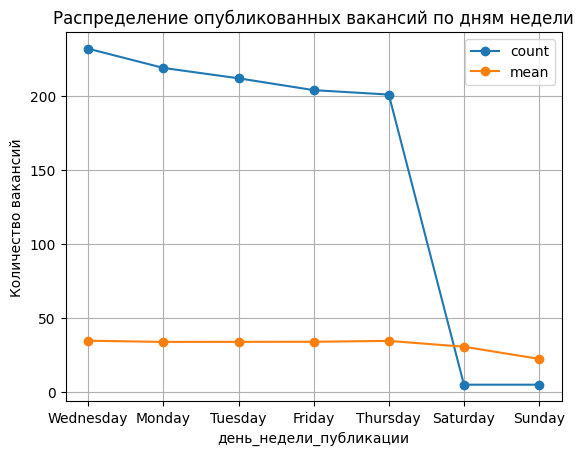

In [93]:
df_new.groupby('день_недели_публикации')['конверсия в %'].agg(['count','mean']).sort_values(by='count',ascending=False).plot(grid=True, style = 'o-')
plt.title('Распределение опубликованных вакансий по дням недели')
plt.ylabel('Количество вакансий')
plt.show()

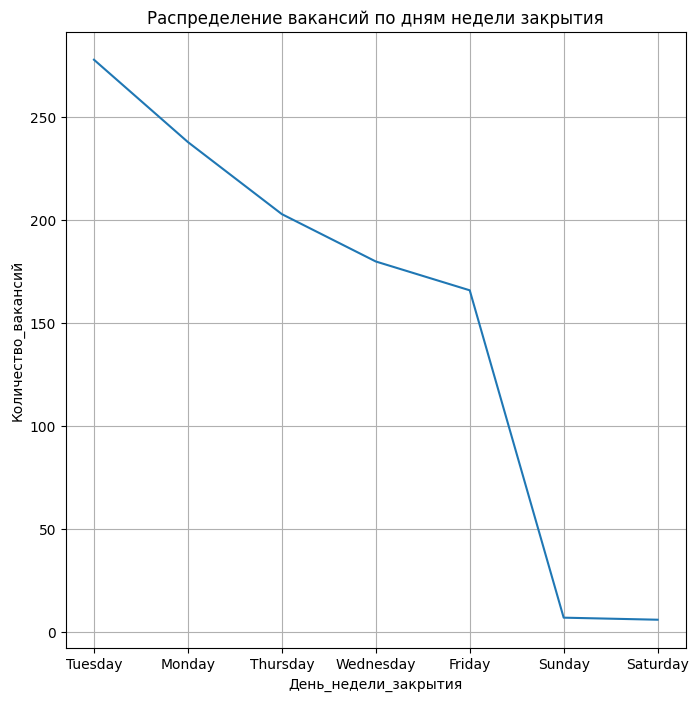

In [94]:
plt.figure(figsize=(8,8))
df_new['день_недели_закрытия'].value_counts().plot(grid=True)
plt.title('Распределение вакансий по дням недели закрытия')
plt.xlabel('День_недели_закрытия')
plt.ylabel('Количество_вакансий')
plt.show()

Вакансии закрываются преимущественно по четвергам и понедельникам, меньше всего вакансий закрываются в субботу и воскресенье, что вполне логично и объясняется выходными днями для hr-специалистов

In [95]:
df_new.groupby('месяц_публикации')['конверсия в %'].agg(['count','mean'])

,count,mean
месяц_публикации,,
1,60,34.164459
2,53,34.930979
3,111,31.514270
4,122,32.421008
5,81,34.468577
6,119,29.390440
7,116,33.892230
8,165,36.321923
9,93,34.953961


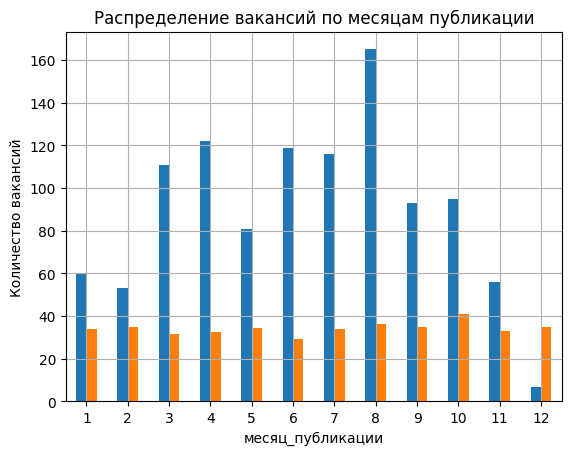

In [96]:
df_new.groupby('месяц_публикации')['конверсия в %'].agg(['count','mean']).plot(kind='bar',legend = False)
plt.title('Распределение вакансий по месяцам публикации')
plt.grid()
plt.xticks(rotation = 0)
plt.ylabel('Количество вакансий')
plt.show()

Как видно из столбчатой диаграммы, большинство вакансий публикуются в летние месяцы(июнь,июль,август). Логично также, что меньше всего вакансии публикаются в декабре и в январе, так как в эти месяцы нет большой необходимости в найме новых сотрудников.

<Axes: >

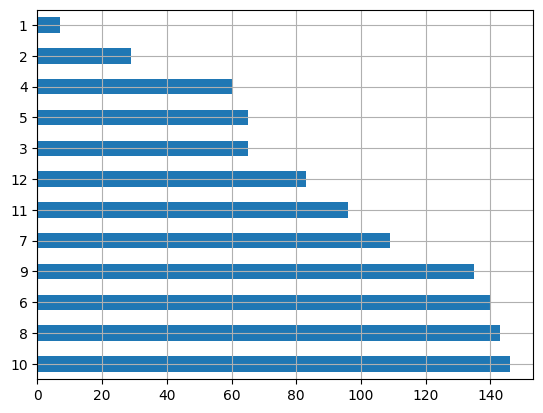

In [97]:
df_new['месяц_закрытия'].value_counts().plot(grid=True, kind = 'barh')

Выводы по исследовательскому анализу данных:

* для каждого числового признака была составлена гистограмма распределения и проверили распределение на нормальность с помощью qq plota;
* сгенерировали новые признаки на основе старых;
* построили корреляционную матрицу и пришли к следующим выводам:
  - Наблюдается заметная положительная связь между количеством откликов и количеством просмотров (0.65)
  - Наблюдается умеренная положительная связь между нижней и верхней границами заработной платы(0.41)
* установили, что только 29 % вакансий закрывается силами КА;
* менеджер 9 разбирает около 46 % всех приходящих заявок;
* 39.5 % всех вакансий являются повторной заявкой, что означает, что это не первая вакансия компании, подбор на которую будет делать КА(здесь и далее КА-кадровое агентство;
* в нашем распоряжении находятся вакансии, опубликованные в период с 10 января 2023 по 18 декаьря 2023 года;
* среднее количество просмотров составило 39.51, среднее количество откликов составило 11.3;
* наибольший спрос на такие вакансии, как project manager, python-разработчик и аналитик данных;
* наиболее популярным форматом оформления является 1 из 5 предложенных к кандидату: (ИП,ГПХ,Самозанятость, Контракт, Трудовой договор). Такой формат оформления встречается в 399 вакансиях. Далее на втором месте трудовой договор(он встречается в 269 вакансиях), на третьем месте - Самозанятость. Такой вариант предлагают в 117 вакансиях;
* cреди наиболее популярных форматов работы можно выделить:
  Удаленный формат(в 554 вакансиях)
  Офис,гибрид(в 180 вакансиях)
  офис,гибрид,удаленка(в 104 вакансиях)
  офис(в 93 вакансиях)
  гибрид, удаленка(в 79 вакансиях)
  гибрид(в 58 вакансиях)
  офис,удаленка(в 10 вакансиях)
* среди наиболее популярных городов, где представлены вакансии:

Москва(736),
Санкт-Петербург(116),
Москва, Санкт-Петербург(26),
Казань(19),
Тюмень(10),
Будва(10)
* большинство вакансий предполагают полную занятость(60 %), далее следуют вакансии, предполагающие стажировку, проектную и частичную занятость. Наименьшее количество вакансий, которые подразумевают волонтерство;
*  в будние дни вакансии публикуются гораздо чаще, чем в выходные. Лидером по количеству опубликованных вакансий является среда (232), меньше всего вакансий публикуются в выходные дни
 Наибольшая конверсия у вакансий, публикующихся среду и четверг


## 4. Обоснование статистического теста и проверка статистических гипотез

Проверим гипотезу различия средней конверсии вакансий, в которых присутствует только удаленный формат работы и где не предусмотрено только удаленного формата работы

Сформулируем гипотезы:

H0-средняя конверсия вакансий, в которых присутствует только удаленка равна средней конверсии вакансий, где не предусмотрена только удаленка

H1 - средняя конверсия вакансий, в которых присутствует только удаленка меньше средней конверсии вакансий, где не предусмотрена только удаленка


In [98]:
# формируем контрольную и экспериментальную выборки

group_a = df_new[df_new['формат_работы'] == 'Удаленка']['конверсия в %']
group_b = df_new[df_new['формат_работы'] != 'Удаленка']['конверсия в %']

In [99]:
len(group_a)

554

In [100]:
len(group_b)

524

In [101]:
len(df_new)

1078

In [102]:
len(group_a) + len(group_b)

1078

Проверим также гипотезу о различии среднего количества просмотров вакансий, опубликованных в среду и в понедельник

Н0: Среднее количество просмотров вакансий,опубликованных в среду равно среднему количеству просмотров вакансий, опубликованных в понедельник

H1: Среднее количество просмотров вакансий,опубликованных в среду больше, чем среднее количество просмотров вакансий, опубликованных в понедельник

In [103]:
# формируем тестовую и экспериментальную выборки

a = df_new[df_new['день_недели_публикации'] == 'Wednesday']['количество_просмотров']
b = df_new[df_new['день_недели_публикации'] == 'Monday']['количество_просмотров']

In [104]:
len(a)

232

In [105]:
len(b)

219

Для проверки статистической гипотезы о равенстве средних будем использовать t-test Стьюдента

In [106]:
results = st.ttest_ind(group_a,group_b, alternative= 'less',equal_var = True)

# определяем уровень статистической значимости
alpha = 0.05

print('Pvalue:', results.pvalue)

if results.pvalue < alpha:

    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')



Pvalue: 0.0003209566180780055
Отвергаем нулевую гипотезу


Получившееся значение P-value меньше 0.05. Таким образом, на имеющихся данных на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
Средняя конверсия вакансий, в которых присутствует только удаленка, меньше средней конверсии вакансий, где не предусмотрена только удаленка


In [107]:
res = st.ttest_ind(a,b, alternative= 'greater',equal_var = True)

# определяем уровень статистической значимости
alpha = 0.05

print('Pvalue:', res.pvalue)

if res.pvalue < alpha:

    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')



Pvalue: 0.5932289577828186
Не отвергаем нулевую гипотезу


Получившееся значение P-value больше 0.05. Таким образом, на имеющихся данных на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Среднее количество просмотров вакансий,опубликованных в среду равно среднему количеству просмотров вакансий, опубликованных в понедельник

Вывод по проверке статистических гипотез:

1. Были сформулированы и проверены статистические гипотезы о равенстве средней конверсии вакансий, в которых присутствует только удаленка и вакансий, в которых предусмотрена не только удаленка, а также о равенстве среднего количества просмотров вакансий, опубликованных в среду и в понедельник

2. По результатам проверок статистических гипотез обнаружено:
* есть статистически значимая разница между средней конверсией вакансий, предусматривающих только удаленку и средней конверсией вакансией, где не предусмотрена только удаленка
* нет статистически значимой разницы между средним количеством просмотров вакансий, опубликованных в среду и опубликованных в понедельник

Вывод:

Проект Мастерской Аналитика рынка вакансий для HR-агенства завершен.

В ходе выполнения проектной работы были изучены и решены цели исследования.

1) На первом шаге исследования загрузили данные из файла, изучили общую информацию о наборе данных, изучили типы данных, определиили размер датасета(1284 строки, 22 столбца). Подготовили данные к дальнейшей предобработке
2) На этапе исследовательского анализа данных получили следующие результаты:
  * для каждого числового признака была составлена гистограмма распределения и проверили распределение на нормальность с помощью qq plota;
  * сгенерировали новые признаки на основе старых;
  * построили корреляционную матрицу и пришли к следующим выводам:
  * наблюдается заметная положительная связь между количеством откликов и количеством просмотров (0.65)
  * наблюдается умеренная положительная связь между нижней и верхней границами заработной платы(0.41)
  *  установили, что только 29 % вакансий закрывается силами КА;
  *  менеджер 9 разбирает около 46 % всех приходящих заявок;
  *  39.5 % всех вакансий являются повторной заявкой, что означает, что это не первая вакансия компании, подбор на которую будет делать КА(здесь и далее КА-кадровое агентство;
  *  в нашем распоряжении находятся вакансии, опубликованные в период с 10 января 2023 по 18 декаьря 2023 года;
  *  среднее количество просмотров составило 39.51, среднее количество откликов составило 11.3;
  *  наибольший спрос на такие вакансии, как project manager, python-разработчик и аналитик данных;
  *  наиболее популярным форматом оформления является 1 из 5 предложенных к кандидату: (ИП,ГПХ,Самозанятость, Контракт, Трудовой договор). Такой формат оформления встречается в 399 вакансиях. Далее на втором месте трудовой договор(он встречается в 269 вакансиях), на третьем месте - Самозанятость. Такой вариант предлагают в 117 вакансиях;
  *  cреди наиболее популярных форматов работы можно выделить: Удаленный формат(в 554 вакансиях) Офис,гибрид(в 180 вакансиях) офис,гибрид,удаленка(в 104 вакансиях) офис(в 93 вакансиях) гибрид, удаленка(в 79 вакансиях) гибрид(в 58 вакансиях) офис,удаленка(в 10 вакансиях)
  *  среди наиболее популярных городов, где представлены вакансии:
Москва(736), Санкт-Петербург(116), Москва, Санкт-Петербург(26), Казань(19), Тюмень(10), Будва(10)
 *   большинство вакансий предполагают полную занятость(60 %), далее следуют вакансии, предполагающие стажировку, проектную и частичную занятость. Наименьшее количество вакансий, которые подразумевают волонтерство;
 *   в будние дни вакансии публикуются гораздо чаще, чем в выходные. Лидером по количеству опубликованных вакансий является среда (232), меньше всего вакансий публикуются в выходные дни Наибольшая конверсия у вакансий, публикующихся среду и четверг

3) По результатам проверок статистических гипотез обнаружено:
  *  есть статистически значимая разница между средней конверсией вакансий, предусматривающих только удаленку и средней конверсией вакансией, где не предусмотрена только удаленка
  *  нет статистически значимой разницы между средним количеством просмотров



## 5. Подготовка презентации для заказчика

Ссылка на презентацию: https://docs.google.com/presentation/d/1OgZc016RLEHZlzvzJYwHkxCqCJzwVQEdlchcIQzYDaU/edit?usp=sharing